# Finding the best place for a new OilyGiant well

Within the framework of this project, it was necessary to find the most profitable regions in terms of profit for drilling oil wells. The data were given of oil production volumes by wells in three regions. Based on these data, I built a model - linear regression - and applied the bootstrap method to identify the most profitable region.

#### PLAN:

##### INVESTIGETION
1. Download and prepare the data. Explain the procedure.
2. Train and test the model for each region:
    * Split the data into a training set and validation set at a ratio of 75:25.
    * Train the model and make predictions for the validation set.
    * Save the predictions and correct answers for the validation set.
    * Print the average volume of predicted reserves and model RMSE.
    * Analyze the results.
3. Prepare for profit calculation:
    * Store all key values for calculations in separate variables.
    * Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.
    * Provide the findings about the preparation for profit calculation step.
4. Write a function to calculate profit from a set of selected oil wells and model predictions:
    * Pick the wells with the highest values of predictions.
    * Summarize the target volume of reserves in accordance with these predictions
    * Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.
5. Calculate risks and profit for each region:
    * Use the bootstrapping technique with 1000 samples to find the distribution of profit.
    * Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.
    * Provide findings: suggest a region for development of oil wells and justify the choice.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

### 1. Download and prepare the data. Explain the procedure.

In [2]:
data0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
data1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
data2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

In [3]:
print()
print('head')
print(data1.head(10))

print()
print('info')
print(data1.info())

print()
print('describe')
print(data0.describe())


head
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
5  HHckp  -3.327590  -2.205276  3.003647   84.038886
6  h5Ujo -11.142655 -10.133399  4.002382  110.992147
7  muH9x   4.234715  -0.001354  2.004588   53.906522
8  YiRkx  13.355129  -0.332068  4.998647  134.766305
9  jG6Gi   1.069227 -11.025667  4.997844  137.945408

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

describe
                  f0             f1             f2     

### 2. Train and test the model for each region

#### Split the data into a training set and validation set at a ratio of 75:25

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


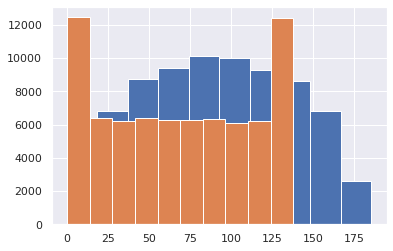

In [4]:
df_train0, df_valid0 = train_test_split(data0, test_size=0.25, random_state=1000001)

features_train0 = df_train0.drop(['product', 'id'], axis=1)
target_train0 = df_train0['product']
print(target_train0.hist())

features_valid0 = df_valid0.drop(['product', 'id'], axis=1)
target_valid0 = df_valid0['product']
#print(target_valid0.hist())

df_train1, df_valid1 = train_test_split(data1, test_size=0.25, random_state=1000001)

features_train1 = df_train1.drop(['product', 'id'], axis=1)
target_train1 = df_train1['product']
print(target_train1.hist())

features_valid1 = df_valid1.drop(['product', 'id'], axis=1)
target_valid1 = df_valid1['product']
#print(target_valid1.hist())

df_train2, df_valid2 = train_test_split(data2, test_size=0.25, random_state=1000001)

features_train2 = df_train2.drop(['product', 'id'], axis=1)
target_train2 = df_train2['product']

features_valid2 = df_valid2.drop(['product', 'id'], axis=1)
target_valid2 = df_valid2['product']
#print(target_valid2.hist())

options: 12

AxesSubplot(0.125,0.125;0.775x0.755)


,index,product
6,0,2082
11,3,2034
8,26,2067
7,30,2080
3,53,2105
0,57,2126
9,80,2063
4,84,2102
5,107,2083
2,110,2110


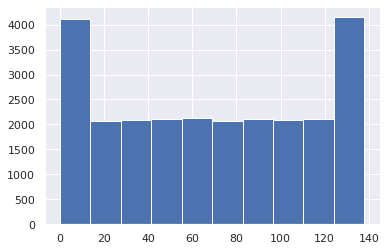

In [5]:
print('options:', target_valid1.value_counts().count())
print()
print(target_valid1.hist())
area1 = pd.DataFrame(target_valid1.value_counts().reset_index())
area1['index'] = area1['index'].astype('int')
area1.sort_values(by='index')

the probability of getting one of the outcomes is 1/12

#### Train the model and make predictions for the validation set

In [6]:
model0 = LinearRegression()
model0.fit(features_train0, target_train0)

model1 = LinearRegression()
model1.fit(features_train1, target_train1)

model2 = LinearRegression()
model2.fit(features_train2, target_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Save the predictions and correct answers for the validation set

In [7]:
predicted_valid0 = model0.predict(features_valid0)
predicted_valid1 = model1.predict(features_valid1)
predicted_valid2 = model2.predict(features_valid2)

mse0 = mean_squared_error(target_valid0, predicted_valid0)
mse1 = mean_squared_error(target_valid1, predicted_valid1)
mse2 = mean_squared_error(target_valid2, predicted_valid2)

#### Print the average volume of predicted reserves and model RMSE.

In [8]:
print('data', '    |', "RMSE", ' |', 'Avg')
print('region 0', '|', round(mse0 ** 0.5, 2), '|', round(predicted_valid0.mean(),2))
print('region 1', '|', round(mse1 ** 0.5, 2), ' |', round(predicted_valid1.mean(),2))
print('region 2', '|', round(mse2 ** 0.5, 2), '|', round(predicted_valid2.mean(),2))

data     | RMSE  | Avg
region 0 | 37.85 | 92.47
region 1 | 0.89  | 69.1
region 2 | 40.12 | 94.99


All three regions have adequate deviations from the mean

### 3. Prepare for profit calculation:

#### Calculate the volume of reserves sufficient for developing a new well without losses.

In [9]:
costs = 100000000 / 200
reserves_without_lossesgross = costs / 4500
reserves_without_lossesgross

111.11111111111111

for the well to pay off, it needs to bring at least 111 units of product

#### Compare the obtained value with the average volume of reserves in each region.

In [10]:
print("Are there enough avg reserves for region 0? -", data0['product'].mean() > reserves_without_lossesgross)
print("Are there enough avg reserves for region 1? -", data1['product'].mean() > reserves_without_lossesgross)
print("Are there enough avg reserves for region 2? -", data2['product'].mean() > reserves_without_lossesgross)

Are there enough avg reserves for region 0? - False
Are there enough avg reserves for region 1? - False
Are there enough avg reserves for region 2? - False


#### Provide the findings about the preparation for profit calculation step.

Average production volumes for the region show that production is unprofitable.

### 4. Write a function to calculate profit from a set of selected oil wells and model predictions:

#### Pick the wells with the highest values of predictions.

In [11]:
predicted_valid0 = model0.predict(features_valid0)
valid_tar_pred0 = pd.DataFrame(target_valid0)
valid_tar_pred0['predicted_valid'] = predicted_valid0
wells0_200 = valid_tar_pred0.sort_values('predicted_valid', ascending=False).head(200)


predicted_valid1 = model1.predict(features_valid1)
valid_tar_pred1 = pd.DataFrame(target_valid1)
valid_tar_pred1['predicted_valid'] = predicted_valid1
wells1_200 = valid_tar_pred1.sort_values('predicted_valid', ascending=False).head(200)


predicted_valid2 = model2.predict(features_valid2)
valid_tar_pred2 = pd.DataFrame(target_valid2)
valid_tar_pred2['predicted_valid'] = predicted_valid2
wells2_200 = valid_tar_pred2.sort_values('predicted_valid', ascending=False).head(200)


#### Summarize the target volume of reserves in accordance with these predictions

In [12]:
print(wells0_200['product'].sum())
print(wells1_200['product'].sum())
print(wells2_200['product'].sum())

29576.60255428084
27589.081548181137
28636.032804001523


#### Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

In [13]:
def region_profit(costs, prod_revenue, predicted_valid, target_valid):
    
    valid_tar_pred = pd.DataFrame(target_valid)
    valid_tar_pred['predicted_valid'] = predicted_valid
    wells_200 = valid_tar_pred.sort_values('predicted_valid', ascending=False).head(200)
    
    revenue = prod_revenue * wells_200['product'].sum()
    return revenue - costs

print('profit from region 0:', region_profit(100000000, 4500, predicted_valid0, target_valid0))
print('profit from region 1:', region_profit(100000000, 4500, predicted_valid1, target_valid1))
print('profit from region 2:', region_profit(100000000, 4500, predicted_valid2, target_valid2))


profit from region 0: 33094711.49426377
profit from region 1: 24150866.966815114
profit from region 2: 28862147.618006855


"Region 0" is the most interesting in terms of profit.

### 5. Calculate risks and profit for each region:

#### Use the bootstrapping technique with 1000 samples to find the distribution of profit.

In [14]:
def region_profit(costs, prod_revenue, predicted_valid, target_valid):

    valid_tar_pred = pd.DataFrame(target_valid)
    valid_tar_pred['predicted_valid'] = predicted_valid
    
    subsample = valid_tar_pred.sample(500, replace=True)
    
    wells_200 = subsample.sort_values('predicted_valid', ascending=False).head(200)

    revenue = prod_revenue * wells_200['product'].sum()
    return revenue - costs

In [15]:
profit_distr0 = []
profit_distr1 = []
profit_distr2 = []

bootstrap_samples = 1000

for i in range(bootstrap_samples):
    profit_distr0.append(region_profit(100000000, 4500, predicted_valid0, target_valid0))
    
for i in range(bootstrap_samples):
    profit_distr1.append(region_profit(100000000, 4500, predicted_valid1, target_valid1))

for i in range(bootstrap_samples):
    profit_distr2.append(region_profit(100000000, 4500, predicted_valid2, target_valid2))

(array([  5.,  29.,  89., 162., 208., 227., 166.,  82.,  27.,   5.]),
 array([-1372834.56616716,  -143579.2636295 ,  1085676.03890816,
         2314931.34144582,  3544186.64398349,  4773441.94652115,
         6002697.24905881,  7231952.55159647,  8461207.85413413,
         9690463.15667179, 10919718.45920946]),
 <a list of 10 Patch objects>)

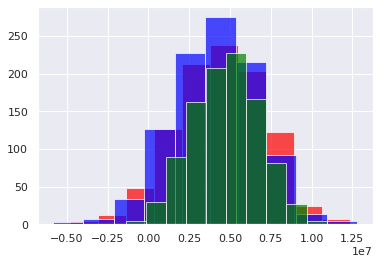

In [16]:
colors = ['red']    
plt.hist(profit_distr0, color=colors, alpha=.7)

colors = ['blue'] 
plt.hist(profit_distr2, color=colors, alpha=.7)

colors = ['green']    
plt.hist(profit_distr1, color=colors, alpha=.7)

#### Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.

In [17]:
values = pd.DataFrame()

df_profit_distr0 = pd.DataFrame(profit_distr0)
df_profit_distr1 = pd.DataFrame(profit_distr1)
df_profit_distr2 = pd.DataFrame(profit_distr2)

values = df_profit_distr0.quantile([.025, .5, .975]).reset_index()
values['profit1'] = df_profit_distr1.quantile([.025, .5, .975]).reset_index()[0]
values['profit2'] = df_profit_distr2.quantile([.025, .5, .975]).reset_index()[0]

values.columns = ['interval', 'profit0', 'profit1', 'profit2']

print(values.round(3))

   interval      profit0      profit1      profit2
0     0.025  -951365.311   774723.523  -969636.328
1     0.500  4428457.465  4798632.879  4170349.315
2     0.975  9145907.896  8564848.326  8819579.309


I use a quantile and not a confidence interval, since my sample has already been formed after the bootstrap

In [18]:
threshold = 0

mu0 = df_profit_distr0.mean()
sigma0 = df_profit_distr0.std()
distr0 = st.norm(mu0, sigma0)

mu1 = df_profit_distr1.mean()
sigma1 = df_profit_distr1.std()
distr1 = st.norm(mu1, sigma1)

mu2 = df_profit_distr2.mean()
sigma2 = df_profit_distr2.std()
distr2 = st.norm(mu2, sigma2)

print('probability of loss for region 0:', distr0.cdf(threshold))
print('probability of loss for region 1:', distr1.cdf(threshold))
print('probability of loss for region 2:', distr2.cdf(threshold))

probability of loss for region 0: [0.0531403]
probability of loss for region 1: [0.00949946]
probability of loss for region 2: [0.05693877]


#### Provide findings: suggest a region for development of oil wells and justify the choice.

All three regions are suitable for development. Of the three, Region 1 looks the most interesting. Region 1 could bring the most profit with hight probability and its development carries the least risks. Region 2 follows Region 1. Region 1 data is not normally distributed.